In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sea
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import xgboost as xgb


In [48]:
df = pd.read_csv('SOLUSTDAtas_tratado.csv')
df.head()

,date,open,high,low,close
0,2020-08-12 03:00:00,3.10,3.35,3.10,3.25
1,2020-08-12 04:00:00,3.25,3.25,3.15,3.15
2,2020-08-12 05:00:00,3.15,3.30,3.15,3.30
3,2020-08-12 06:00:00,3.30,3.30,3.15,3.30
4,2020-08-12 07:00:00,3.25,3.25,3.20,3.25


In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36400 entries, 0 to 36399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    36400 non-null  object 
 1   open    36400 non-null  float64
 2   high    36400 non-null  float64
 3   low     36400 non-null  float64
 4   close   36400 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.4+ MB
None


# Preprocesado de Datos

In [50]:
tamanio = df.shape[0]

In [51]:
df_train = df.copy().loc[0:int(tamanio*0.7)]
df_train

,date,open,high,low,close
0,2020-08-12 03:00:00,3.10,3.35,3.10,3.25
1,2020-08-12 04:00:00,3.25,3.25,3.15,3.15
2,2020-08-12 05:00:00,3.15,3.30,3.15,3.30
3,2020-08-12 06:00:00,3.30,3.30,3.15,3.30
4,2020-08-12 07:00:00,3.25,3.25,3.20,3.25
...,...,...,...,...,...
25476,2023-07-11 21:00:00,22.00,22.05,21.90,22.00
25477,2023-07-11 22:00:00,22.00,22.10,21.90,22.00
25478,2023-07-11 23:00:00,22.00,22.05,21.75,21.95
25479,2023-07-12 00:00:00,21.95,22.10,21.90,22.05


In [52]:
df_vali = df.copy().loc[int(tamanio*0.7 + 1):int(tamanio*0.9)]
df_vali

,date,open,high,low,close
25481,2023-07-12 02:00:00,22.10,22.30,22.05,22.15
25482,2023-07-12 03:00:00,22.15,22.25,22.10,22.10
25483,2023-07-12 04:00:00,22.10,22.10,22.00,22.00
25484,2023-07-12 05:00:00,22.00,22.00,21.90,21.95
25485,2023-07-12 06:00:00,21.95,22.05,21.90,22.00
...,...,...,...,...,...
32756,2024-05-10 05:00:00,153.65,154.35,152.85,153.95
32757,2024-05-10 06:00:00,153.95,154.70,153.45,153.75
32758,2024-05-10 07:00:00,153.75,154.10,152.30,153.30
32759,2024-05-10 08:00:00,153.30,155.10,153.15,154.95


In [53]:
df_test = df.copy().loc[int(tamanio*0.9 + 1):tamanio]
df_test

,date,open,high,low,close
32761,2024-05-10 10:00:00,154.35,154.5,153.45,154.10
32762,2024-05-10 11:00:00,154.10,154.8,153.25,154.15
32763,2024-05-10 12:00:00,154.15,154.3,153.25,154.15
32764,2024-05-10 13:00:00,154.15,155.2,153.00,155.05
32765,2024-05-10 14:00:00,155.05,155.4,153.10,153.30
...,...,...,...,...,...
36395,2024-10-08 20:00:00,143.35,143.9,142.35,142.95
36396,2024-10-08 21:00:00,142.95,144.1,142.25,143.75
36397,2024-10-08 22:00:00,143.75,144.5,143.35,144.50
36398,2024-10-08 23:00:00,144.50,144.7,144.05,144.25


# Declaramos y Entrenamos el modelo

In [54]:
regr1 = RandomForestRegressor(max_depth=100, random_state=0)

In [55]:
X1 = []
y1= []
for i in range(0, df_train.shape[0] - 1):
    auxy = df_train.iloc[i + 1]
    y1.append(auxy.close)
    aux = df_train.iloc[i]
    aux1 = []
    for r in range(1, aux.size):
        aux1.append(aux[r])
    X1.append(aux1)

C:\Users\raulg\AppData\Local\Temp\ipykernel_1736\2244255699.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aux1.append(aux[r])


In [56]:
regr1.fit(X1, y1)

RandomForestRegressor(max_depth=100, random_state=0)

In [57]:
Vali1 = []
aux = df_vali.iloc[0]
for r in range (0,100):
    aux = df_vali.iloc[r]
    Vali1aux = []
    for i in range(1, aux.size):
        Vali1aux.append(aux[i])
    Vali1.append(Vali1aux)
    print(Vali1)
predict = regr1.predict(Vali1)
print(predict)

[[22.1, 22.3, 22.05, 22.15]]
[[22.1, 22.3, 22.05, 22.15], [22.15, 22.25, 22.1, 22.1]]
[[22.1, 22.3, 22.05, 22.15], [22.15, 22.25, 22.1, 22.1], [22.1, 22.1, 22.0, 22.0]]
[[22.1, 22.3, 22.05, 22.15], [22.15, 22.25, 22.1, 22.1], [22.1, 22.1, 22.0, 22.0], [22.0, 22.0, 21.9, 21.95]]
[[22.1, 22.3, 22.05, 22.15], [22.15, 22.25, 22.1, 22.1], [22.1, 22.1, 22.0, 22.0], [22.0, 22.0, 21.9, 21.95], [21.95, 22.05, 21.9, 22.0]]
[[22.1, 22.3, 22.05, 22.15], [22.15, 22.25, 22.1, 22.1], [22.1, 22.1, 22.0, 22.0], [22.0, 22.0, 21.9, 21.95], [21.95, 22.05, 21.9, 22.0], [22.0, 22.1, 22.0, 22.05]]
[[22.1, 22.3, 22.05, 22.15], [22.15, 22.25, 22.1, 22.1], [22.1, 22.1, 22.0, 22.0], [22.0, 22.0, 21.9, 21.95], [21.95, 22.05, 21.9, 22.0], [22.0, 22.1, 22.0, 22.05], [22.0, 22.2, 22.0, 22.05]]
[[22.1, 22.3, 22.05, 22.15], [22.15, 22.25, 22.1, 22.1], [22.1, 22.1, 22.0, 22.0], [22.0, 22.0, 21.9, 21.95], [21.95, 22.05, 21.9, 22.0], [22.0, 22.1, 22.0, 22.05], [22.0, 22.2, 22.0, 22.05], [22.05, 22.15, 22.0, 22.05]]
[[22.

C:\Users\raulg\AppData\Local\Temp\ipykernel_1736\3783098748.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Vali1aux.append(aux[i])


In [58]:
Valirpr = []
for i in range(0,100):
    Valirpr.append(df_vali.iloc[i].close)

In [59]:
regr1.score(Vali1, Valirpr)

0.9935510800503526

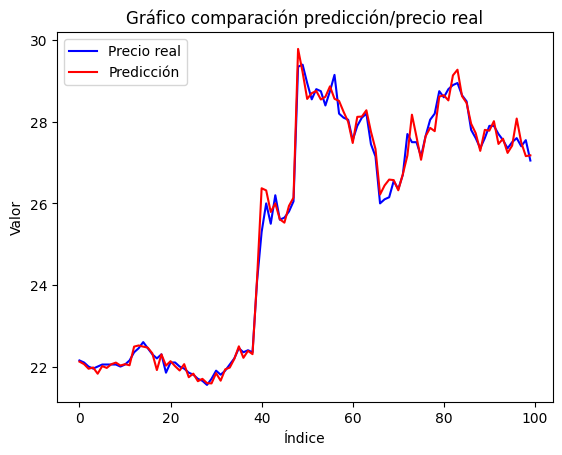

In [60]:
plt.plot(Valirpr, color='blue', label='Precio real')  # Línea azul
plt.plot(predict, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [61]:
suma = 0
n = len(Valirpr)
mae = np.mean(np.abs(Valirpr - predict))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predict[i] - Valirpr[i])/Valirpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 0.1531798888888873
El error medio porcentualemente es: 0.5826308649396155


In [83]:
Vali1 = [[146.73, 147.29, 146.50, 146.74]]
predict1 = regr1.predict(Vali1)
predict1

array([146.603])

In [63]:
abs(predict1 - 146.43)/146.43

array([0.00104487])

# Predicción Utilizando XGBoost

Ponemos los datos en el formato correcto

In [64]:
df_xgb = df.copy()
df_xgb['close_next'] = df_xgb['close'].shift(-1)


In [65]:
df_xgb = df_xgb.dropna()
df_xgb

,date,open,high,low,close,close_next
0,2020-08-12 03:00:00,3.10,3.35,3.10,3.25,3.15
1,2020-08-12 04:00:00,3.25,3.25,3.15,3.15,3.30
2,2020-08-12 05:00:00,3.15,3.30,3.15,3.30,3.30
3,2020-08-12 06:00:00,3.30,3.30,3.15,3.30,3.25
4,2020-08-12 07:00:00,3.25,3.25,3.20,3.25,3.25
...,...,...,...,...,...,...
36394,2024-10-08 19:00:00,143.80,143.95,142.40,143.35,142.95
36395,2024-10-08 20:00:00,143.35,143.90,142.35,142.95,143.75
36396,2024-10-08 21:00:00,142.95,144.10,142.25,143.75,144.50
36397,2024-10-08 22:00:00,143.75,144.50,143.35,144.50,144.25


In [66]:
tamanio_xgb = df_xgb.shape[0]
tamanio_xgb

36399

In [67]:
df_train_xgb = df_xgb.copy().loc[0:int(tamanio_xgb*0.7)]
df_train_xgb

,date,open,high,low,close,close_next
0,2020-08-12 03:00:00,3.10,3.35,3.10,3.25,3.15
1,2020-08-12 04:00:00,3.25,3.25,3.15,3.15,3.30
2,2020-08-12 05:00:00,3.15,3.30,3.15,3.30,3.30
3,2020-08-12 06:00:00,3.30,3.30,3.15,3.30,3.25
4,2020-08-12 07:00:00,3.25,3.25,3.20,3.25,3.25
...,...,...,...,...,...,...
25475,2023-07-11 20:00:00,22.10,22.10,21.95,22.00,22.00
25476,2023-07-11 21:00:00,22.00,22.05,21.90,22.00,22.00
25477,2023-07-11 22:00:00,22.00,22.10,21.90,22.00,21.95
25478,2023-07-11 23:00:00,22.00,22.05,21.75,21.95,22.05


In [68]:
df_vali_xgb = df_xgb.copy().loc[int(tamanio_xgb*0.7 + 1):int(tamanio_xgb*0.9)]
df_vali_xgb

,date,open,high,low,close,close_next
25480,2023-07-12 01:00:00,22.05,22.15,22.00,22.10,22.15
25481,2023-07-12 02:00:00,22.10,22.30,22.05,22.15,22.10
25482,2023-07-12 03:00:00,22.15,22.25,22.10,22.10,22.00
25483,2023-07-12 04:00:00,22.10,22.10,22.00,22.00,21.95
25484,2023-07-12 05:00:00,22.00,22.00,21.90,21.95,22.00
...,...,...,...,...,...,...
32755,2024-05-10 04:00:00,153.40,153.80,152.70,153.65,153.95
32756,2024-05-10 05:00:00,153.65,154.35,152.85,153.95,153.75
32757,2024-05-10 06:00:00,153.95,154.70,153.45,153.75,153.30
32758,2024-05-10 07:00:00,153.75,154.10,152.30,153.30,154.95


In [69]:
df_test_xgb = df_xgb.copy().loc[int(tamanio_xgb*0.9 + 1):tamanio_xgb]
df_test_xgb

,date,open,high,low,close,close_next
32760,2024-05-10 09:00:00,154.95,155.75,154.25,154.35,154.10
32761,2024-05-10 10:00:00,154.35,154.50,153.45,154.10,154.15
32762,2024-05-10 11:00:00,154.10,154.80,153.25,154.15,154.15
32763,2024-05-10 12:00:00,154.15,154.30,153.25,154.15,155.05
32764,2024-05-10 13:00:00,154.15,155.20,153.00,155.05,153.30
...,...,...,...,...,...,...
36394,2024-10-08 19:00:00,143.80,143.95,142.40,143.35,142.95
36395,2024-10-08 20:00:00,143.35,143.90,142.35,142.95,143.75
36396,2024-10-08 21:00:00,142.95,144.10,142.25,143.75,144.50
36397,2024-10-08 22:00:00,143.75,144.50,143.35,144.50,144.25


Definimos las características para el entrenamiento

In [74]:
X = df_train_xgb[['open', 'high', 'low', 'close']] 
y = df_train_xgb['close_next']
X1 = df_vali_xgb[['open', 'high', 'low', 'close']] 
y1 = df_vali_xgb['close_next']

In [87]:
dtrain = xgb.DMatrix(data=X, label=y)
dvali = xgb.DMatrix(data=X1, label=y1)

In [80]:
param = {'max_depth': 10, 'eta': 0.1, 'objective': 'reg:squarederror'}
evals = [(dtrain, 'train'), (dvali, 'validacion')]

In [85]:
bst = xgb.train(param, dtrain, num_boost_round=10)

In [89]:
bst = xgb.train(param, dtrain, num_boost_round=1000, verbose_eval=10) # No se puede ejecutar con los parámetros evals=evals, early_stopping_rounds=10 